# 네이버 검색어 트랜드 API 사용

[네이버 검색어 트렌드 API를 사용해 보죠.. 그리고 타다~](https://pinkwink.kr/1215?category=580892)

<br>

In [9]:
client_id = 'AetbNReCm1y9HWQlWaEw'
client_secret = 'FIfFPCUO_x'

In [10]:
import urllib.request
import json

In [11]:
def get_trend(body) :
    
    url = "https://openapi.naver.com/v1/datalab/search"
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type", "application/json")
    response = urllib.request.urlopen(request,
                                      data=body.encode("utf-8"))
    
    return json.loads(response.read().decode('utf-8'))

In [13]:
body = {
    "startDate": "2019-01-01",
    "endDate": "2019-04-30",
    "timeUnit": "date",
    "keywordGroups": [
        {
            "groupName": "타다",
            "keywords": ["타다","소카","vcnc","VCNC"]
        }
    ]
}

body = json.dumps(body, indent=4, ensure_ascii=False)

tada_raw_data = get_trend(body)

In [14]:
tada_raw_data

{'startDate': '2019-01-01',
 'endDate': '2019-04-30',
 'timeUnit': 'date',
 'results': [{'title': '타다',
   'keywords': ['타다', '소카', 'vcnc', 'VCNC'],
   'data': [{'period': '2019-01-01', 'ratio': 7.91896},
    {'period': '2019-01-02', 'ratio': 11.63998},
    {'period': '2019-01-03', 'ratio': 11.15597},
    {'period': '2019-01-04', 'ratio': 11.26694},
    {'period': '2019-01-05', 'ratio': 12.30816},
    {'period': '2019-01-06', 'ratio': 8.86338},
    {'period': '2019-01-07', 'ratio': 10.5539},
    {'period': '2019-01-08', 'ratio': 10.66251},
    {'period': '2019-01-09', 'ratio': 11.25749},
    {'period': '2019-01-10', 'ratio': 13.13689},
    {'period': '2019-01-11', 'ratio': 12.10275},
    {'period': '2019-01-12', 'ratio': 10.31779},
    {'period': '2019-01-13', 'ratio': 8.42423},
    {'period': '2019-01-14', 'ratio': 10.79236},
    {'period': '2019-01-15', 'ratio': 13.24786},
    {'period': '2019-01-16', 'ratio': 11.62582},
    {'period': '2019-01-17', 'ratio': 12.47816},
    {'period':

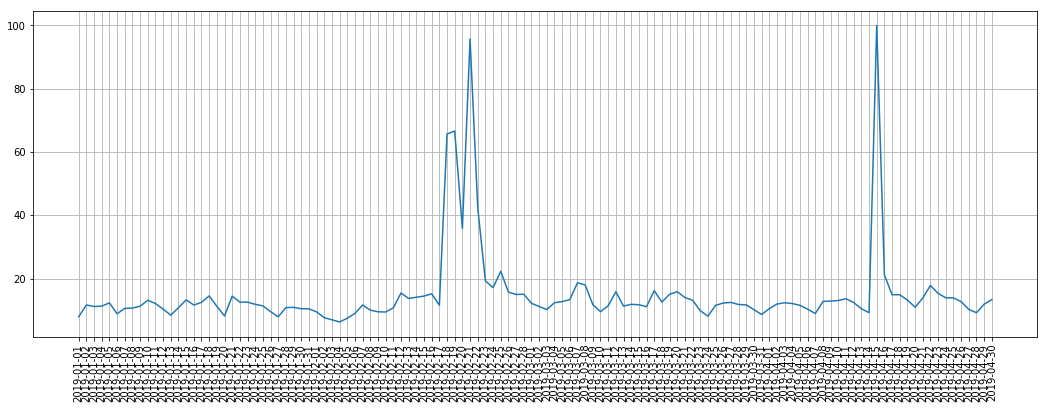

In [16]:
ratio = [each['ratio'] for each in tada_raw_data['results'][0]['data']]
date = [each['period'] for each in tada_raw_data['results'][0]['data']]

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,6))
plt.plot(date, ratio)
plt.grid()
plt.xticks(rotation=90)
plt.show()

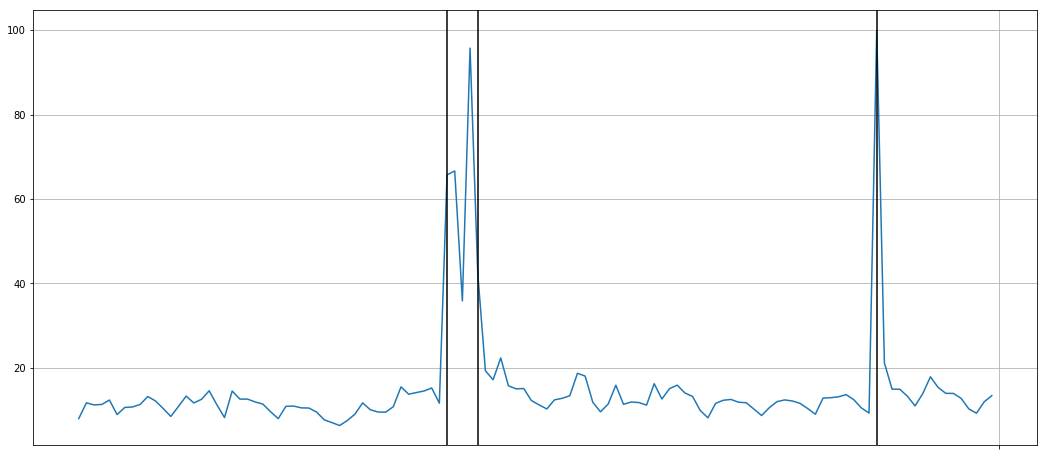

In [18]:
import pandas as pd

tada_pd = pd.DataFrame({'data': ratio}, index=date)
vertical_range = tada_pd[tada_pd['data'] > 30]

vline = [vertical_range.index[0],
         vertical_range.index[-2],
         vertical_range.index[-1]]

plt.figure(figsize=(18,8))
plt.plot(date, ratio)

for each in vline :
    plt.axvline(x=each, color='black')
    
plt.grid()
plt.xticks('')
plt.show()

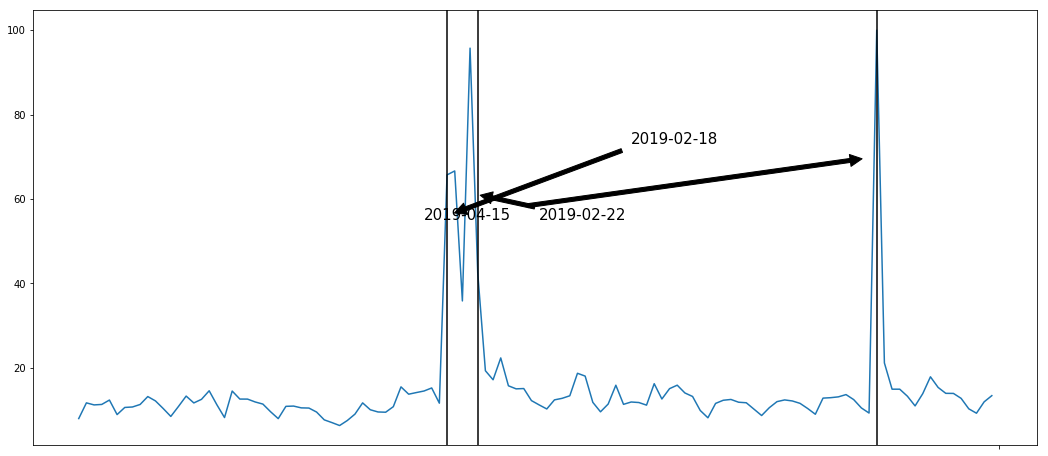

In [20]:
from random import randint

plt.figure(figsize=(18,8))
plt.plot(date, ratio)

for each in vline :
    plt.axvline(x=each, color='black')
    plt.annotate(each, xy=(each, randint(40, 80)),
                 xytext=(randint(40, 80),
                         randint(40, 80)),
                 size=15,
                 arrowprops=dict(facecolor='black',
                                 shrink=0.04))
    
plt.xticks('')
plt.show()